## Project | Deep Learning: Image Classification with CNN

# Data Preprocessing

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16



In [10]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [11]:
# Normalize images to [0,1] range
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [12]:
# classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, horizontal_flip=True
)
datagen.fit(X_train)


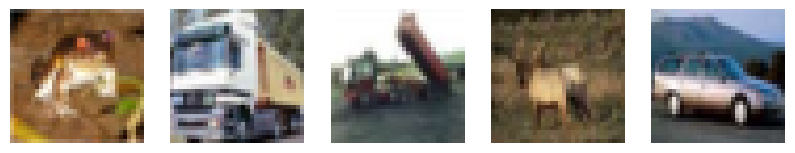

In [14]:
# Visualizing Sample Images

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")
plt.show()


TypeError: list indices must be integers or slices, not numpy.float64

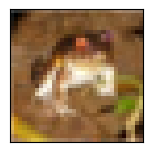

In [16]:
#visualizations
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


# Model Architecture

In [ ]:
# Building the CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define improved CNN model with regularization
model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.3),  # Increased Dropout

    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.4),  # Increased Dropout

    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.5),  # Increased Dropout

    Flatten(),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Increased Dropout
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile model with lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0003),  # Reduced LR
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


##  Model Training

In [ ]:
#  Model Training

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Adjust ReduceLROnPlateau for better optimization
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5, verbose=1)

# Train the improved CNN model with a larger batch size
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=50,  # Increased epochs
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])


In [ ]:
model.save("model_5.h5")

##Model Evaluation

In [ ]:

# Evaluate the  CNN model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Improved CNN Model Test Accuracy: {test_acc:.4f}")

In [ ]:
# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot Accuracy  & validation accuracy
axs[0].plot(history.history['accuracy'], label='Train Accuracy',color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy',color='red')
axs[0].legend()
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True);


# Plot training & validation loss
axs[1].plot(history.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True);

plt.tight_layout()
plt.show() # Display the plots


In [ ]:

# Predict labels
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [ ]:
# Compute accuracy, precision, recall, and F1-score for the model's performance
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1= f1_score(y_true, y_pred, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

In [ ]:
# print a detailed classification report
print(classification_report(y_true, y_pred))

##Transfer Learning

##improve the model using transfer learning using a pre-trained model VGG16, using PyTorch. We will load the pre-trained VGG16 model and train the new model on the CIFAR-10 dataset.

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 1. Load Pre-trained VGG16 Model
vgg16 = models.vgg16(pretrained=True)

# 2. Freeze Pre-trained Layers
for param in vgg16.parameters():
    param.requires_grad = False

# 3. Modify the Classifier for CIFAR-10 (10 classes)
num_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_features, 10)  # Replace the last layer

# 4. Define Transformations
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images for VGG16 input
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 5. Load CIFAR-10 Dataset
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 6. Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier[6].parameters(), lr=0.001)  # Only optimize the classifier

# 7. Move Model to GPU (if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

# 8. Training Loop
epochs = 10
for epoch in range(epochs):
    vgg16.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# 9. Evaluation
vgg16.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg16(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy}%")


In [ ]:
# Print final accuracy and loss values
print(f"Final Training Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.4f}")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:4f}")


In [ ]:
# 10. Plot Accuracy and Loss Graphs
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot Accuracy
axs[0].plot(train_accuracies, label='Train Accuracy', color='blue')
axs[0].plot(val_accuracies, label='Validation Accuracy', color='red')
axs[0].legend()
axs[0].set_title('VGG16 Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True)

# Plot Loss
axs[1].plot(train_losses, label='Train Loss', color='blue')
axs[1].plot(val_losses, label='Validation Loss', color='red')
axs[1].legend()
axs[1].set_title('VGG16 Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Predict class probabilities
vgg16.eval()
y_pred_probs = []
y_true = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg16(inputs)
        y_pred_probs.extend(outputs.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

y_pred = np.argmax(np.array(y_pred_probs), axis=1)
y_true = np.array(y_true)


In [ ]:
#metrics
print(f'Accuracy: {accuracy_score(y_true, y_pred):.4f}')
print(f'Precision: {precision_score(y_true, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_true, y_pred, average="weighted"):.4f}')
print(f'F1-score: {f1_score(y_true, y_pred, average="weighted"):.4f}')
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
